<IPython.core.display.Javascript object>


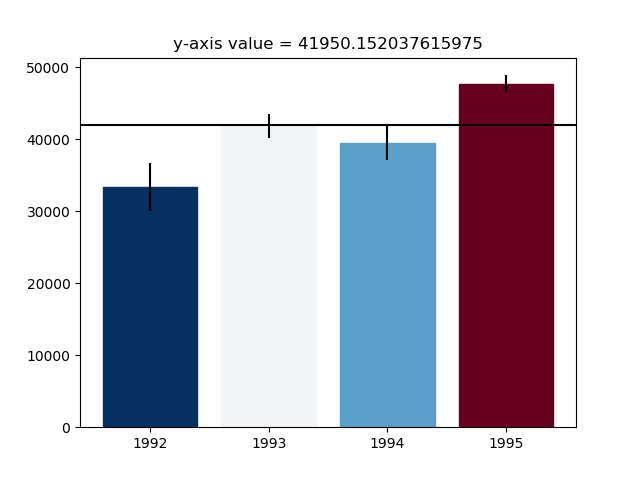

In [13]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as st
matplotlib.colors.Normalize

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#standard error is computed as standard deviation/sample size
average_by_year=df.mean(axis=1)
y_error= df.std(axis=1)/np.sqrt(df.shape[1])

df_std=df.std(axis=1)

#choose colormap and initialize norm function

color_map=cm.get_cmap('RdBu')
norm=matplotlib.colors.Normalize(vmin=-1.96, vmax=1.96)

plt.xticks([0,1,2,3],['1992','1993','1994','1995'])

#plotting horizontal line at 42000
h_line=41700
y_line=plt.axhline(y=h_line,color='black')

#normalize to select color from colormap
prob = st.norm.cdf(( h_line - average_by_year)/(y_error))


color_input=[]
for i in range(0,len(prob)):
    color_input.append(color_map(prob[i]))

#set number of bars and plot
number_of_bars=range(df.shape[0])
bars=plt.bar(number_of_bars,average_by_year,yerr=y_error, color=color_input)
plt.gca().set_title('y-axis value = {}'.format(h_line))

#dynamically change axhline position and bar colors
def onclick(event):
    plt.gca().set_title('y-axis value = {}'.format(event.ydata))
    y_line.set_ydata(event.ydata)

    
    for i in range(4):
        shade = color_map(norm((event.ydata-average_by_year.values[i])/y_error.values[i]))
        bars[i].set_color(shade)     
    plt.gcf().canvas.draw_idle()
    
    
plt.gcf().canvas.mpl_connect('button_release_event', onclick);


